In [1]:
pip install transformers torchvision pillow torch


Note: you may need to restart the kernel to use updated packages.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Cosine Similarity: 0.95583165
Genuine Signature


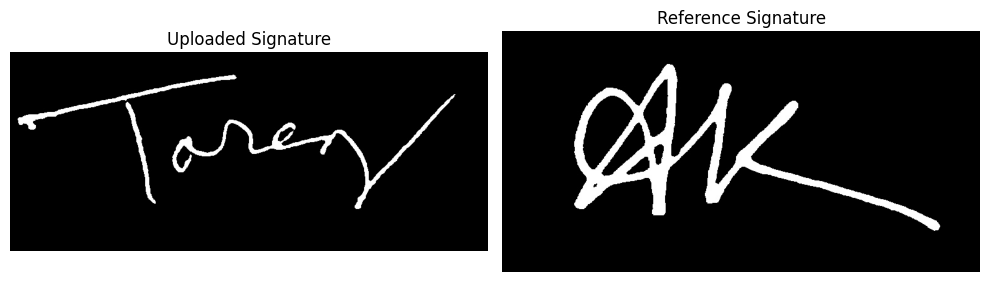

In [4]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load TrOCR model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model.eval()

# Function to extract image embedding
def extract_vector(image_path):
    image = Image.open(image_path).convert("RGB")
    
    # Preprocess image
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    
    with torch.no_grad():
        # Extract encoder output
        encoder_outputs = model.encoder(pixel_values)
        last_hidden_state = encoder_outputs.last_hidden_state  # shape: (1, seq_len, hidden_dim)

    # Global average pooling across sequence length
    vector = last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    
    # Normalize vector for cosine similarity
    return vector / np.linalg.norm(vector)

#image Path
image_path_uploaded = "check_signature_test_case/process_signature/tareq_1.jpeg"
image_path_stored = "check_signature_test_case/process_signature/anik_2.jpeg"

# Load two signatures
vec1 = extract_vector(image_path_uploaded)
vec2 = extract_vector(image_path_stored)

# Function to compute cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2)

similarity = cosine_similarity(vec1, vec2)
print("Cosine Similarity:", similarity)

if similarity >= 0.90:
    print("Genuine Signature")
else:
    print("Forged Signature")

# Cell 8: Visualize both images
uploaded_img = Image.open(image_path_uploaded)
stored_img = Image.open(image_path_stored)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(uploaded_img, cmap='gray')
axs[0].set_title("Uploaded Signature")
axs[0].axis('off')

axs[1].imshow(stored_img, cmap='gray')
axs[1].set_title("Reference Signature")
axs[1].axis('off')

plt.tight_layout()
plt.show()

